# 선형 회귀(선형 모델)

    y = w[0]*x[0] + w[1]*x[1] +..... +  b
    
    최적의 선형모델을 찾는게 목적
    머신러닝1에서 직접 파라미터를 넣어보고 (하이퍼파라미터) 했었는데 이건 불가능이다.
    하이퍼파라미터같은 것이 없다. 
    
    기울기인 w를 최적으로 찾는것

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


import mglearn
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()    
# 한글폰트가 기본적으로 없다.  그래서 따로 등록해서 사용하면 됨
font_name
#(c\windows\fonts  가 기본폰트)

plt.rc('font', family=font_name)

# - 마이너스 표시도 깨진다.
mpl.rcParams["axes.unicode_minus"]=False    #마이너스를 문자로 쓰지 않고 숫자로 쓰겠다. 라는 뜻


import mglearn

from sklearn.model_selection import train_test_split

C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


w[0]: 0.393906  b: -0.031804


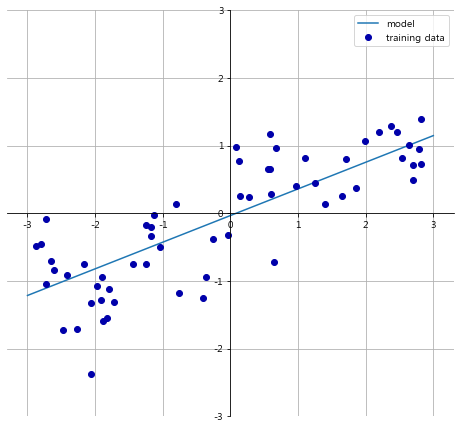

In [2]:
mglearn.plots.plot_linear_regression_wave()  #regression_wave함수는 샘플

# 점들은 훈련용 데이터이다. 
# 선은 예측선(모델)이라고 한다.
# 이 선을 찾는게 목적
# 평균제곱 오차 ((실제값, 기대값의 차이)의 제곱의 합) = MSE(Mean Square Error) 라고함
#     1/n ∑(y-y')^2

# 과연 w를 뭘 써야 좋을지 스스로 학습을 한다. 
# 초평면(hyper plane) 직선의 한계를 벗어났다는 의미, 직선이 오히려 좋은거일 수도 있다. 
# 선형회귀에서 직선같은경우 차원이 높아질때 오히려 정확도를 높이는 놈이 된다. (그래서 초평면이라고 부름)

In [4]:
from sklearn.linear_model import LinearRegression  #선형회귀를 구현할 수 있는 


#회귀분석용 샘플 make_wave 
X, y = mglearn.datasets.make_wave(n_samples=60)  #60개 데이터 가져오기

#훈련용 테스트용 구분 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# 객체 생성
lr = LinearRegression()

# 저번에 knn 알고리즘을 썼다.
# 그런데 위에 인자가 없다. / 하이퍼 파라미터가 없다는 것. / 선형회귀는 우리가 제어할 수 없다.
# 훈련 시키기 
lr.fit(X_train, y_train)

#?? 코드가 왜케 단순하지? -> 샘플자체가 정제되고 준비되어서 전처리가 할게 없어서 그럼

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
dir(lr)
# coef_ 변수  : 기울기
# intercept_ 변수 : 절편

print("기울기 : {}, 절편 : {}".format(lr.coef_, lr.intercept_))
# 결과는 기울기 0.3939, 절편 -0.0318  이 나왔다.

print("훈련점수 : ", lr.score(X_train, y_train))  # 회귀분석 점수에선 r^2의계수로 점수를 판단한다. 
print("테스트점수 : ", lr.score(X_test, y_test))  

기울기 : [0.39390555], 절편 : -0.031804343026759746
훈련점수 :  0.6700890315075756
테스트점수 :  0.65933685968637


In [7]:
# 실습
# 주제 : 전기 생산량과 소비량 

# 귀무가설 : 전기생산량과 전기 소비량간의 상관관계가 있다.    (관계검증을 하고 예측하겠다)

# 월별 전기 사용량 (백만 kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.06, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

# 월별 전기 생산금액(억원)
X = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]



In [8]:
# 생산량 4억원 일때 사용량은 얼마인가?(예측)
# 먼저 관계검정부터 한다. 
from scipy import stats #로봇, 과학 등등 사용하는 패키지, 그중에서 통계만 쓴다. 
result = stats.linregress(X, y)  #인자로 x(입력),y(결과) 값을 준다
result

# p-value : 상관관계가 있다. 
# 이 결과를 보면 기울기와 절편이 구해졌음.. 
# 위에 훈련시켰을때도 기울기와 절편이 있었는데 이건 현재데이터만 보고 한것

LinregressResult(slope=0.49579979723159046, intercept=0.9196511210886049, rvalue=0.8920228914769683, pvalue=9.618472580047509e-05, stderr=0.0794436858342908)

In [9]:
# lr2 = LinearRegression().fit(X, y)  
#위에선 X, y를 넘겨주면 되는데 훈련데이터일 땐 X 즉 데이터는 2차 shape의 모양을 하고 있어야함.
#여기 X는 그냥 list이다. 그래서 변형시켜줘야함

# X 바꾸기
num = np.array(X) # 1. 우선 배열로 바꿔준다
num = num.reshape(-1, 1)
lr2 = LinearRegression().fit(num, y)
print(lr2.coef_,",", lr2.intercept_)

# 훈련시킨결과도 위에서 한 기울기와 절편이랑 같은 값이나온걸 확인할 수 있음
# stats는 다만 통계분석에 가깝게 제공한다뿐 

# 기울기가 학습된 결과이므로 가장 중요하다.
# 기울기를 다른말로는 '가중치'라고 표현한다 (Weight)
# 또는 계수라고 표현 (실제 계산하는 값)


[0.4957998] , 0.9196511210886051


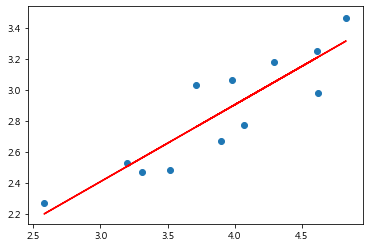

In [10]:
# 그래프를 그려보자
slope, intercept, r_value, p_value, stderr = stats.linregress(X, y)
# 위 회귀분석 관계검증에서 한 결과와 같이 나오게 함

plt.scatter(X, y)
#양의 상관관계가 뚜렷하다

# 선그리기
plt.plot(np.array(X), slope*np.array(X)+intercept, c="red") #배열로 넘겨줘야한다. 그래서 변환해줘야함
#  slope*np.array(X)+intercept  ===>  wx + b 를 의미함


In [11]:
# 생산량 4일때의 사용량 궁금했으니 
result = slope * 4 + intercept  # wx+b 에서 x에 4를 넣으면 결과가 된다. 
print("결과 : ", result)



결과 :  2.9028503100149665


In [12]:
# boston 집값 데이터 기억하시는지?
# 고차원 특성에 대한 과대적합

X, y= mglearn.datasets.load_extended_boston()   #load_extended 음.. 같은 샘플을 확장시킨..? 그런건가
X.shape  #컬럼이 13개였는데 104개로 늘려짐
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
lr = LinearRegression().fit(X_train, y_train)


In [14]:
print("훈련점수 : ", lr.score(X_train, y_train))  # 회귀분석 점수에선 r^2의계수로 점수를 판단한다. 
print("테스트점수 : ", lr.score(X_test, y_test)) 

# 훈련 점수는 높은데
# 테스트 점수는 상당히 낮다
# 과대적합 때문일것이다. 
# 이럴 때 쓰는 모델이 또 있다.

훈련점수 :  0.9520519609032729
테스트점수 :  0.6074721959665752


### 릿지(Ridge) 회귀 모델

    
    과대적합 대표 모델 
        릿지 : 가장 많이 쓰는 모델이다.  
        라쏘 :
        엘라스틱(릿지+라쏘) : 성능은 좋은데 불편 
        
        
    릿지 회귀모델 특징
    - L2 규제 (Regularization) : L2 norm방식으로 구현함. 패널티 적용해서 
    
        1/n ∑(y-y')^2 + α∑(w^2)    MSE식 뒤에 추가된것(패널티)
        MSE항에 Penalty항 추가
        알파에 따라 가중치영향이 바뀐다. 
        -α를 크게 하면 패널티효과가 커진다 (가중치 감소)
        -α를 작게 하면 패널티효과가 작아진다 (가중치 증가)
        

In [15]:
# 과대적합일 때 위에처럼 부정확해지는 결과가 나오므로 
# Linear 쓰면 안됨, 다른 모델을 써야한다. 
# 굉장히 많은 모델이 있는데 릿지를 사용하자

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) # alpha = 1.0 기본값이다. 

# 다시 확인해보자 과대적합일때
print("훈련점수 : ", ridge.score(X_train, y_train))  
print("테스트점수 : ", ridge.score(X_test, y_test)) 


#결과 차이가 줄었음을 알 수 있다. (극적이게 많이 편화는 줄 수 없음)
# 그래서 α 값을 변화시켜서 성능을 올릴 수 있다. 



훈련점수 :  0.885796658517094
테스트점수 :  0.7527683481744755


In [16]:
# α를 변화 시켜보자 

ridge10 = Ridge(alpha=10).fit(X_train, y_train) # alpha = 10으로 줬다. 
print("훈련점수 : ", ridge10.score(X_train, y_train))  
print("테스트점수 : ", ridge10.score(X_test, y_test)) 

# α를 높였더니 훈련점수가 더 나빠지고 테스트도 나빠졌다. 

# 근데 언제 이상적인 값을 찾을 수 있을 것인가.

훈련점수 :  0.7882787115369614
테스트점수 :  0.635941148917731


In [17]:
# α를 낮춰보자 (가중치를 증가시켜보자//패널티효과를 줄이자)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train) # alpha = 0.1으로 줬다. 
print("훈련점수 : ", ridge01.score(X_train, y_train))  
print("테스트점수 : ", ridge01.score(X_test, y_test)) 


# 훈련점수와 테스트 점수가 높아졌다.  

훈련점수 :  0.9282273685001985
테스트점수 :  0.772206793647982


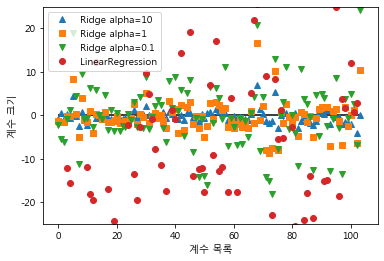

In [18]:
#그래프 그리기
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

# α = 0.1일때 좀 퍼지는걸 알수있다
# α = 10 일땐 0에 엄청 가깝게 모여있다.

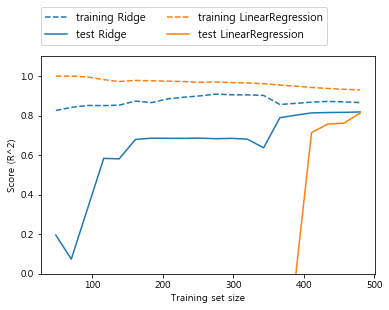

In [19]:
# α값을 1.0으로 고정시킨 상태에서 데이터의 크기 조절
# 릿지와 linear를 비교하는 그래프이다

mglearn.plots.plot_ridge_n_samples()
# x축이 데이터 갯수, y축은 성능

# 같은 훈련용을 비교해볼때 ridge(파랑점선)는 linear(노랑점선)를 넘지 못하고 있다

# 실제 테스트용을 비교해보면 데이터가 커지면 ridge(파랑선)가 훨씬 좋다. 
# linear는 데이터가 400개가 넘어야 겨우 훈련이 된다.

# 근데 데이터가 더 많아지면 linear나 ridge나 결국 성능 차이가 없어진다. 

### 라쏘(Lasso) 회귀모델

    - L1 규제 사용
    - 알파를 크게 하면 패널티 효과 커짐()
    - 알파를 작게 하면 패널티 효과 작아짐()
    - 특성 선택이 자동으로 이루어짐
    

In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train) # alpha = 1.0 기본값이다. 
print("훈련점수 : ", lasso.score(X_train, y_train))  
print("테스트점수 : ", lasso.score(X_test, y_test)) 
print("사용한 특성의 수 : ", np.sum(lasso.coef_ != 0)) 

# 특성을 104개중에서 네개만 사용했다.
# 과대적합을 피했더니 과소적합이다. 
# 그래서 α를 조절해준다.

훈련점수 :  0.29323768991114607
테스트점수 :  0.20937503255272294
사용한 특성의 수 :  4


In [21]:
# α값 0.01로 조절하기 (규제를 조금 느슨하게)

# 단 알파값을 낮추면 반복횟수가 늘어나기 때문에 최대 반복횟수를 제한할 필요가 있다.
# 반복횟수로 10만번으로 제한
lasso001 = Lasso(alpha = 0.01, max_iter=100000).fit(X_train, y_train) # alpha = 0.01 기본값이다. 
print("훈련점수 : ", lasso001.score(X_train, y_train))  
print("테스트점수 : ", lasso001.score(X_test, y_test)) 
print("사용한 특성의 수 : ", np.sum(lasso001.coef_ != 0)) 


# 특성의 수가 33개로 늘어났다. 
# 성능도 훨씬 좋아졌다.
# α값에 따라 어떻게 될지 성능이 차이가 난다. 

훈련점수 :  0.8962226511086497
테스트점수 :  0.7656571174549983
사용한 특성의 수 :  33


In [22]:
# α값 0.0001로 조절하기 (규제를 더 느슨하게)

# 단 알파값을 낮추면 반복횟수가 늘어나기 때문에 최대 반복횟수를 제한할 필요가 있다.
# 반복횟수로 10만번으로 제한
lasso00001 = Lasso(alpha = 0.0001, max_iter=100000).fit(X_train, y_train) # alpha = 0.01 기본값이다. 
print("훈련점수 : ", lasso00001.score(X_train, y_train))  
print("테스트점수 : ", lasso00001.score(X_test, y_test)) 
print("사용한 특성의 수 : ", np.sum(lasso00001.coef_ != 0)) 

# 특성의 수가 96개로  훠어얼씬 늘어났다. 
# 훈련 성능도 훨씬 좋아졌다.
# 다만 테스트점수는 훨씬 떨어져서 과대적합과 다를바 없어졌다.

# grid search방법이 있는데 그냥 수작업으로 해봤다.


훈련점수 :  0.9507158754515467
테스트점수 :  0.6437467421272709
사용한 특성의 수 :  96


### ElasticNet : Ridge + Lasso



In [23]:
# Elastic L1 규제, L2 규제를 같이 사용

# Lasso, Ridge를 쓸 때 알파값 하나를 조절했는데
# Elastic을 쓰면 두개를 조절해야되서 더 경우의 수가 많아진다. (L1의 알파, L2의 알파)



--------------------------------------------------
--------------------------------------------------
### Boston sample을 이용한 다중 선형 회귀

In [24]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.data.shape
print(boston.feature_names) #결과는 요인들

print(boston.target) #집값

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 

In [25]:
# 집값을 단순하게 예측하는걸 우선 해보자 

model_boston = LinearRegression().fit(boston.data, boston.target) #X값, y값
model_boston.coef_

# x값이 13개(컬럼 13개)가 있다.
# 그래서 w1x1 + w2x2 + w3x3 + ... + w13x13 + b가 됨
# 그래서 결과는 가중치(w)도 13개가 나온것

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

Text(0.5, 1.0, '집값 예측치와 실제 집값의 관계')

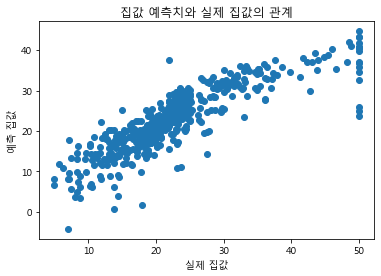

In [26]:
# 예측을 해볼까요
# 원랜 테스트데이터로 예측해야하는데
# 없어서 훈련데이터로 예측을 해보도록 함

pred = model_boston.predict(boston.data) 

plt.scatter(boston.target, pred)
plt.xlabel("실제 집값")
plt.ylabel("예측 집값")
plt.title("집값 예측치와 실제 집값의 관계")

#양의 상관관계이다. 

# 근데 어떤 영향이 가장 큰 영향을 주는가. 비교하기 위해 pair plot로 봐본다. 

In [30]:
# 어떤게 영향을 주는지 확인
# seaborn의 pairplot

# 우선 seaborn으로 넘기려면 dataframe으로 만들어준다.
df = pd.DataFrame(boston.data, columns = [boston.feature_names])
df.head(10)

# 평균집값 항목을 추가해준다.
df["MEDV"] = boston.target
df.head(10)




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


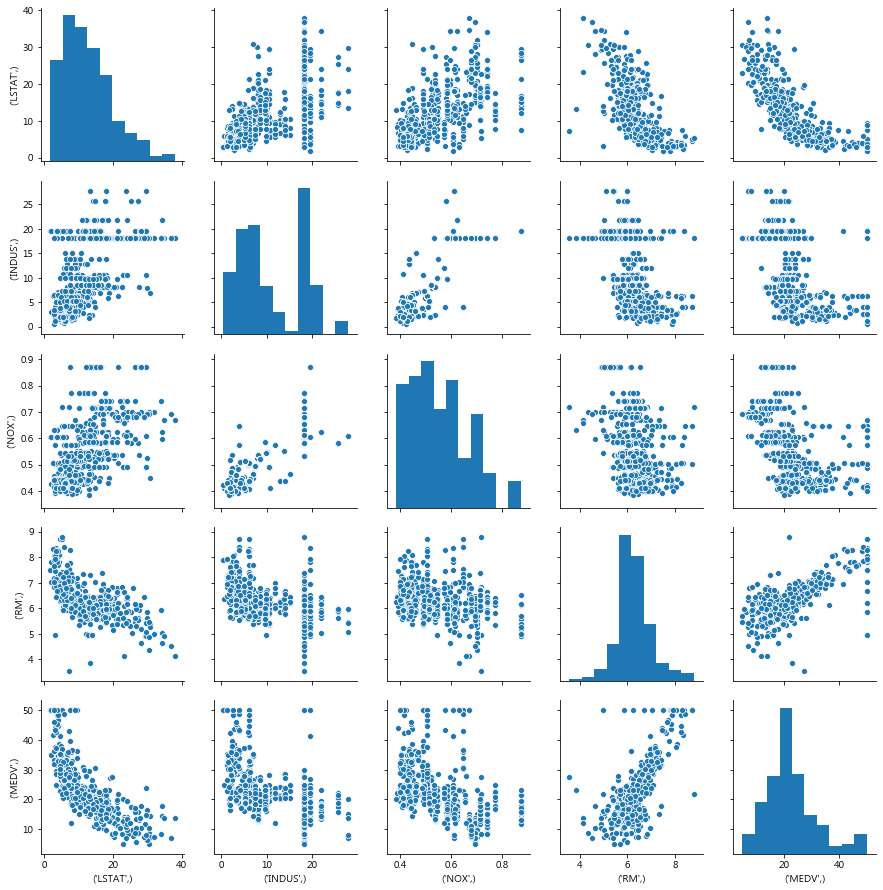

In [28]:
# 이 13개의 데이터중 몇개를 추출하여 pair plot으로 확인해보자
cols = ["LSTAT","INDUS", "NOX", "RM", "MEDV"]
sns.pairplot(df[cols], size=2.5)

# 결과를 보면 LSTAT과 RM이 음의 상관관계를 가지는거 같은데....??
# 상관없는것은 NOX, INDUS 같은데..

# 맞는거 같다. 

In [29]:
# pairplot은 여러개 그래프만 보여주지만
# 수치도 같이 보여주는게 있다. seaborn의 heatmap

# 수치를 뿌려주려면 상관계수를 알아야하므로 
# 상관계수 구하기

cc = np.corrcoef(df[cols].values.T)
sns.heatmap(cc, yticklabels = cols, xticklabels = cols, annot=True, square=True, 
            annot_kws={"size":15})

# 빈약

Error in callback <function flush_figures at 0x0000000008B47B88> (for post_execute):


KeyboardInterrupt: 

In [57]:
# RM 방이 몇개일때 집값은 얼마일까(예측)

# x부터 뽑읍시다.(DataFrame으로)
X = df[["RM"]].values

# y도 뽑읍시다. (Series로 뽑아야하는데 우선 DF로 뽑아보기)
y = df[["MEDV"]].values
# print(y)
# 훈련 시키기
lr = LinearRegression().fit(X, y)
print(lr.coef_, lr.intercept_)

house_val = lr.predict(np.array([[5]]))
print("방이 [%d]개인 주택 가격은 약 [%.f]달러이다."%(5, house_val*1000))

[[9.10210898]] [-34.67062078]
방이 [5]개인 주택 가격은 약 [10840]달러이다.


In [69]:
# 뭔가 이상한데

#Linear
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Linear훈련점수 : ", lr.score(X_train, y_train))  # 회귀분석 점수에선 r^2의계수로 점수를 판단한다. 
print("Linear테스트점수 : ", lr.score(X_test, y_test)) 


#Ridge
ridge = Ridge(alpha = 5).fit(X_train, y_train) 
print("Ridge훈련점수 : ", ridge.score(X_train, y_train))  
print("Ridge테스트점수 : ", ridge.score(X_test, y_test)) 

#Lasso
lasso = Lasso(alpha = 0.1).fit(X_train, y_train)
print("Lasso훈련점수 : ", lasso.score(X_train, y_train))  
print("Lasso테스트점수 : ", lasso.score(X_test, y_test)) 
print("Lasso사용한 특성의 수 : ", np.sum(lasso.coef_ != 0)) 

Linear훈련점수 :  0.48689351384859914
Linear테스트점수 :  0.4725972743191255
Ridge훈련점수 :  0.48717116761839097
Ridge테스트점수 :  0.4701456607021369
Lasso훈련점수 :  0.48727622406416704
Lasso테스트점수 :  0.46983383810919627
Lasso사용한 특성의 수 :  1


# 분류형 선형모델
    - 로지스틱 선형회귀 : 기본중의 기본
    - SVM : 머신러닝알고리즘중 끝판왕
            가장 복잡하지만 가장 정확
            (Support Vector Machine)
            
    1) 로지스틱 회귀분석 : 
        회귀분석이 붙어있어서 헷갈릴 순 있는데 연속적인 수치를 정하는게 아니다
        사용 알고리즘
        - 로지스틱 loss(cost) function : 오차를 구하는 함수
        - 1/ (1 + e^-w) 분류하는 것
        
    2) SVM에서 제공하는 선형 모델
        사용 알고리즘 
        - 교차 엔트로피 loss function
        

선형모델은 직선이다. 하지만 직선 회귀선은 엄청 차이나는 값이 들어오면
직선자체 기울기가 변해버려서 오차가 심하게 발생할 수도 있다.

직선 : wx + b
시그모이드 : e^wx + b



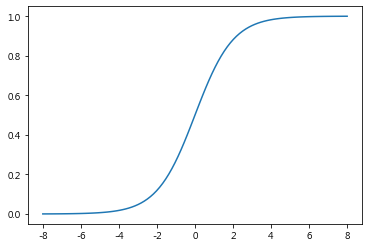

In [71]:
# 시그모이드(sigmoid) 그래프 그리기

# 입력 x를 받아서 대입 후 선을 그려지게 
def sigmoid(x) :
    result = []
    for i in x:
        result.append(1/(1+np.exp(-i)))  #각 i 오차 
    return result

x = np.linspace(-8, 8, 100) # -8~8까지 수를 100개 생성
sig = sigmoid(x)

plt.plot(x, sig)

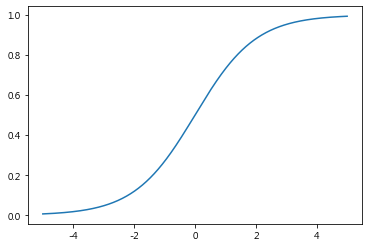

In [74]:
# 데이터 갯수를 늘려보자

x = np.linspace(-5,5, 1000)
plt.plot(x, 1/(1+np.exp(-x)))

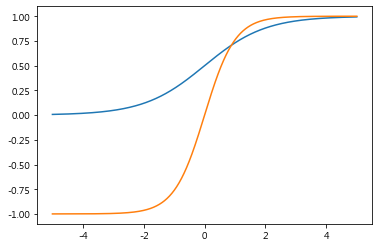

In [79]:
# 범위가 너무 좁으면 오차를구하기가 어려우므로 
# 그래서 tanh를 곱한다. - 범위를 늘리기 위함
# tanh를 곱하자
plt.plot(x, 1/(1+np.exp(-x)))
plt.plot(x, np.tanh(x))

#예측선이 유연한 S가 아니라 거의 꺾여가는 모습이 더 좋다.

In [7]:
# 선형회귀모델과 같은 패키지이다..
# 근데 회귀는 아님
from sklearn.linear_model import LogisticRegression

# 가장 우수한 알고리즘이라고 알려진 svm
# 선형모델이라는 점에서는 공통점이다.
from sklearn.svm import LinearSVC  

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


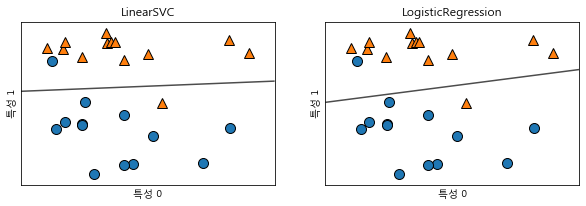

In [81]:
# 두개의 알고리즘을 비교

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
    
# 두개 같은데이터 다른 알고리즘이다.
# 그런데 결과는 거의 차이가 없다는 것을 알 수 있다.
# 경계선이 미묘하게만 차이있을뿐.

# 선을 어떻게 긋느냐에 따라 제어하는 방법에 차이가 생길 수 있다. 
# 아까 hyper parameter를 알파로 정했다.

# 직선이기 때문에 선형모델이라서 이거 또한 성능을 조절해줄 수 있다. 
# cost (c)가 하이퍼 파라미터이다.

# 예를 들으 linearSVC 부분을 c 조절해서 다시 그려보자

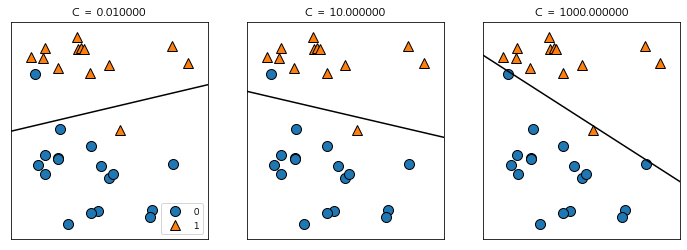

In [82]:
# c값의 차이 보기

mglearn.plots.plot_linear_svc_regularization()
# 과대해석을 방지하기 위한 규제 방법
# c값에 따라 결과를 보여준다.

# 여기서 c=1000이 되면 너무 편중되는건 있다.
# 보기에는 되게 정확해보이지만
# 현재 훈련데이터에만 맞춘 결과라는 것이다.
# 그래서 테스트값이 잘못될 수도 있다.  (과적)


# c = 0.01이 오히려 새로운값이 들어왔을 때 오차가 적을 수도 있다는것

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0,
                                                   stratify = cancer.target)

#stratify = cancer.target  훈련용과 테스트용 비율을 똑같이 나누는것 (기준점인가?)

In [8]:
logreg = LogisticRegression().fit(X_train, y_train) 
# hyperparam  C=1 이 기본값
# 패널티 속성이 있다. 기본값 penalty = "l2"  // l1, l2 값이 있다.
#  L2 : 전부 // L1 : 몇개의특성만 뽑아 모델을단순하게

print("훈련점수 : ", logreg.score(X_train, y_train))  
print("테스트점수 : ", logreg.score(X_test, y_test)) 

# 훈련점수와 테스트점수가 비슷해서 뭔가 과소적합이 아닐까 의심은 해볼 순 있지만,
# 우선은 괜찮은걸로 보자


훈련점수 :  0.9647887323943662
테스트점수 :  0.9370629370629371


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
# Hyper param  c= 100
# 규제를 완화시키기
logreg = LogisticRegression(C=100).fit(X_train, y_train) 

print("훈련점수 : ", logreg.score(X_train, y_train))  
print("테스트점수 : ", logreg.score(X_test, y_test)) 

# 훈련, 테스트 수치가 조금씩 올랐다.
# 모델이 좀더 복잡해졌고 그에 따라 과적합이라는 것이다. 
# 훈련성능이 좋아짐
# 테스트값도 높아졌다는 것은 C=1보다 C=100을 줌으로써 훨씬 정확도 향상에 도움을 준것

# C를 높였다는 것은 규제를 안했다는 의미이다. 

훈련점수 :  0.9788732394366197
테스트점수 :  0.9440559440559441


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
# Hyper param  c= 0.01
# 규제를 강하게 주기
logreg = LogisticRegression(C=0.01).fit(X_train, y_train) 


print("훈련점수 : ", logreg.score(X_train, y_train))  
print("테스트점수 : ", logreg.score(X_test, y_test)) 

# 훈련점수가 낮아졌다 = 일반화가 되었다.
# 규제가 되었다. 

훈련점수 :  0.9389671361502347
테스트점수 :  0.9230769230769231


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
# C=1일때 l1, l2 비교
logreg1l2 = LogisticRegression(penalty="l2").fit(X_train, y_train) 
print("L2훈련점수 : ", logreg1l2.score(X_train, y_train))  
print("L2테스트점수 : ", logreg1l2.score(X_test, y_test)) 

logreg1l1 = LogisticRegression(penalty="l1").fit(X_train, y_train) 
print("L1훈련점수 : ", logreg1l1.score(X_train, y_train))  
print("L1테스트점수 : ", logreg1l1.score(X_test, y_test)) 

# C=1일땐 별 차이가 없다. 

L2훈련점수 :  0.9647887323943662
L2테스트점수 :  0.9370629370629371
L1훈련점수 :  0.9671361502347418
L1테스트점수 :  0.9300699300699301


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
# C100일때 l1 규제로만 바꿔보기
logreg100l2 = LogisticRegression(C=100, penalty= "l2").fit(X_train, y_train) 
print("L2훈련점수 : ", logreg100l2.score(X_train, y_train))  
print("L2테스트점수 : ", logreg100l2.score(X_test, y_test)) 

logreg100l1 = LogisticRegression(C=100, penalty= "l1").fit(X_train, y_train) 
print("L1훈련점수 : ", logreg100l1.score(X_train, y_train))  
print("L1테스트점수 : ", logreg100l1.score(X_test, y_test)) 

# C가 높을땐 l2가 결과가 좋다.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


L2훈련점수 :  0.9788732394366197
L2테스트점수 :  0.9440559440559441
L1훈련점수 :  0.9929577464788732
L1테스트점수 :  0.9370629370629371


In [17]:
logreg001l2 = LogisticRegression(C=0.01, penalty="l2").fit(X_train, y_train) 
print("L2훈련점수 : ", logreg001l2.score(X_train, y_train))  
print("L2테스트점수 : ", logreg001l2.score(X_test, y_test)) 

logreg001l1 = LogisticRegression(C=0.01, penalty="l1").fit(X_train, y_train) 
print("L1훈련점수 : ", logreg001l1.score(X_train, y_train))  
print("L1테스트점수 : ", logreg001l1.score(X_test, y_test)) 

# 어? 데이터가 잘못됐나;; 이런값이 아닐텐데..  아무튼
# 테스트 점수가 더 높아진다. 

L2훈련점수 :  0.9389671361502347
L2테스트점수 :  0.9230769230769231
L1훈련점수 :  0.92018779342723
L1테스트점수 :  0.9090909090909091


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 여기까지 한것이 이진 분류이다
------------------------------------------------------------

## 여러개 중에 하나를 선택해야할 때도 있을 것이다. 
## 다중 클래스 분류라고 한다.

실제 알고리즘은 이진 분류밖에 지원하지않는다
그래서 만약 세개의 분류를 한다면 세번 분류해야 한다. 여러번 수행해야한다는 것

불편하지

10개중에 1개 분류한다면? 

그런데 로지스틱 회귀분석에 다중클래스분류를 지원한다.  
softmax 여러개 클래스에 확률값, 그 확률이 높은거를 찾는것이다.

이것은 로지스틱 회귀분석밖에 없으므로 이걸 꼭 해야함
로지스틱 회귀분석은 딥러닝때도 같이 가져가야함

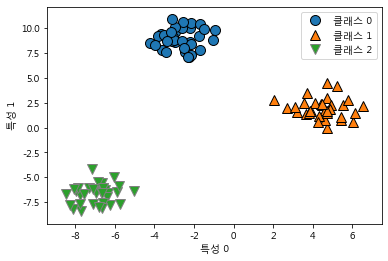

In [20]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

# 이 그래프를 보면 셋중에 하나를 선택해야 한다. 

    다른 선형모델은 이진모델밖에 지원하지 않기 때문에 어떻게 해야할까
    세개를 동시에 분류 못하므로 둘씩 분석할 것이다. 
    파랑, 초록
    파랑, 노랑
    노랑, 초록

    다른 알고리즘들은 이렇게 분석할 것이다.

In [23]:
# SVM을 이용해서 어떻게 분류하는지 확인해보자
# svm으로 훈련시키기
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape) #가중치(변수의 크기)
print(linear_svm.intercept_.shape) #절편

(3, 2)
(3,)


    3,2 -> 3행 2열   각 세종류에서 두개씩 대응이 된다.
                    (파랑이냐 아니냐)
                    (녹색이냐 아니냐)
                    (노랑이냐 아니냐)    

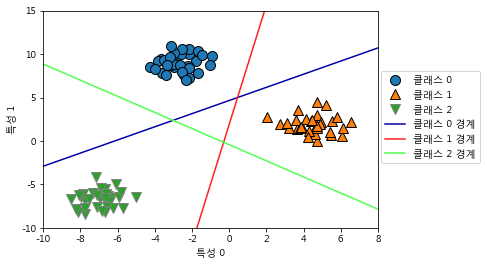

In [24]:
# 그래프로 한번 그려보기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc=(1.01, 0.3))

    홀리... 
    이진 분류를 세번 수행해서 저런 경계선이 그려진다. 

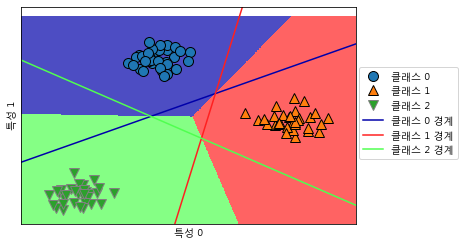

In [26]:
# 그래프로 한번 그려보기
# 분류 영역에 색을 칠해서 
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)  
# fill=True 색을 채우겠다. 
# alpha 투명도

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계", "클래스 1 경계", "클래스 2 경계"], loc=(1.01, 0.3))

    선형회귀에선 상관없는데 분류에서는 아주 중요한 검정이 있다.
# 적합도 검정
    1) Accuracy  : 정확도 판단,  전체 갯수에서 맞춘 것                    
    2) Precision : 정확도 판단, 몇개를 틀렸냐를 판단하는 것
    3) Recall    : 다시 한번 검출, 
    4) F1 Score  : Precision, Recall을 합친 평균을 가지고 있음. 그래서 이것만 써도 된다.   

    과연 내가 분류한 결과가 정말 적합한가에 대한 것
    
    예를들어
    샘플 -> 과연 이환자가 암환자인가 아닌가 
            여기에서 정상판정이 있을 것
            
            1000명 중 
            
                    --------------------> Precision
             |           | 정상판정    암환자
             |   ---------------------------
             |   정상환자 | 988(TN)    2(FP)
             |   ---------------------------
             V   암환자   |   1(FN)    9(TP)
          recall 
                *TN : True Negative  (음성으로 잘 판단했다)
                *FN : False Negative 

            정상환자 판별률은 98% 정확도인데
            암환자는 판별률이 10명(총암환자) 9명으로 판단했기 때문에 90% 밖에 안된다.
            이런 프로그램이 있다면 망했겠죠.
    
    
    이런 것을 정확도만으로 판단해서는 안된다. 
    앞에서는 정확도만 판단했는데 분류는 왜 정확도로만 판단해서는 안될까?
    데이터의 갯수가 엄청 차이가 나는 경우가 있기 때문에 정확도로 판단하면 안되는 것
    여기서도 정상환자는 900명대인데 암환자는 10명밖에 안되기 때문이다. 
    
    
    그래서 어떤 방법으로 검정을 해야하느냐
    
    -------------------------------------------------------------------------------------------
    1) Accuracy  : 정확도 판단,  전체 갯수에서 맞춘 것
                    샘플로 보면 1000명중 맞춘 것은 988 + 9 = 997명이다.
                    정답률이 그래서 99.7% 인데 이것만 보면 아주 좋은 프로그램인데 
                    그게 아니라는 것이다. 정확도로만은 모른다. 
                    잘한쪽만 보는게 Accuracy이다.
                    
                    (TN+TP)/ALL = 0.997     맞은것/전체
                    
    2) Precision : 정확도 판단, 몇개를 틀렸냐를 판단하는 것
                    
                    TP / (TP + FP) = 9/11     맞은것 / (맞은것+틀린것)
                   
    3) Recall    : 다시 한번 검출, 
    
                    TP / (TP + FN) = 9 / 10   맞은것 / (맞은것+틀린것)
                    
    * 위 두개는 한쪽 관점만 측정했던걸 다양한관점으로 보기 위한 방법이다.
    
    
    4) F1 Score  : Precision, Recall을 합친 평균을 가지고 있음. 그래서 이것만 써도 된다.   

----------------------------------------------------------------------
이것까지는 이진분류라 쉽게 한다했지만 다중 분류일때는 복잡해진다


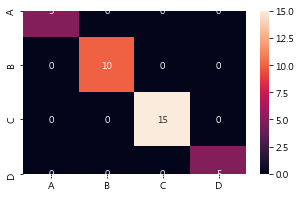

In [31]:
#자료 -> confusion_matrix.pdf

# 그림을 토대로 DF 만들기 
arr = [[5, 0, 0, 0],
      [0, 10, 0, 0],
      [0, 0, 15, 0],
      [0, 0, 0, 5]]

df_cm = pd.DataFrame(arr, index=[i for i in 'ABCD'], columns=[i for i in 'ABCD'])
df_cm

plt.figure(figsize=(5,3))
sns.heatmap(df_cm, annot=True)

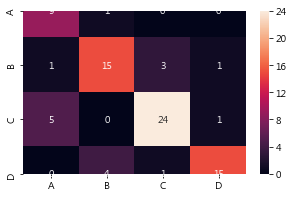

In [33]:
# 그림 2. Confusion Matrix with Confusion
arr = [[9, 1, 0, 0],
      [1, 15, 3, 1],
      [5, 0, 24, 1],
      [0, 4, 1, 15]]

df_cm = pd.DataFrame(arr, index=[i for i in 'ABCD'], columns=[i for i in 'ABCD'])
df_cm

plt.figure(figsize=(5,3))
sns.heatmap(df_cm, annot=True)

# 이렇게만 보고 과연 AI는  C를 잘 맞춘다고 할 수 있을까.
# 각 실행횟수가 다르기 때문에 정규화(Normalize)을 해줘야한다. 

In [35]:
# Normalize 하기

total = np.sum(arr, axis=1) #행기준으로 전체 구하기
total

# 정규화 (각 합으로 비율 구하기)
arr = arr/total[:, None]
arr

#A 기준으로
# A로 잘못 판단한것  False Positive
# A를 잘못 판단한것  False Negative 


array([[0.9       , 0.1       , 0.        , 0.        ],
       [0.05      , 0.75      , 0.15      , 0.05      ],
       [0.16666667, 0.        , 0.8       , 0.03333333],
       [0.        , 0.2       , 0.05      , 0.75      ]])

pdf p.7
조화평균 harmonic Mean

A와 B가 평균값이 다른데 
높이로 평균을 구하는것
작은 값에 인센티브를 줘서 조화를 이루게 평균을 구하는 것

그래서 precision, recall을 조화평균을 이용해서 구하는게 좀더 낫다

In [37]:
# 예시
y_true = [2, 0, 2, 2, 0, 1] #실제값
y_pred = [0, 0, 2, 2, 0, 2] #예측값

# 이런 데이터가 있을 때 분할 표를 그리고 적합도를 찾아야하는데
# 일일이 그리고 만들 필요가 없고

from sklearn.metrics import confusion_matrix   # 이걸 이용하면 쉽게 분할표를 만들 수 있다.

confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

대각선을 보면 0은 2번, 1은 못맞춤, 2는 2번 맞췄다.

In [40]:
# 예시 2
y_true = [1, 0, 1, 1, 0, 1] #실제값
y_pred = [0, 0, 1, 1, 0, 1] #예측값

confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

0은 2개, 1은 3개 맞췄다. 
1을 틀린건 1개

In [41]:
# 인덱스 순서 교체
confusion_matrix(y_true, y_pred, labels=[1,0])

array([[3, 1],
       [0, 2]], dtype=int64)

In [42]:
from sklearn.metrics import classification_report

# 예시 2
y_true = [0, 0, 0, 1, 1, 0, 0] #실제값
y_pred = [0, 0, 0, 0, 1, 1, 1] #예측값

print(classification_report(y_true, y_pred, target_names=["class 0","class 1"]))
# 한번에 확인해준다. 

              precision    recall  f1-score   support

     class 0       0.75      0.60      0.67         5
     class 1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [44]:
# 위에 결과를 그래프로도 확인가능하다
# ROC curve 사용(AUC)

# y쪽에 굉장히 붙어있다면 좋다고 알고만 있는게 좋다.

# 분류 샘플 만들 때 유용한게 있다.
from sklearn.datasets import make_classification # 내가 만드는 분류 샘플이다.
X, y = make_classification(n_samples = 1000, n_features=2, n_informative=2, n_redundant=0, 
                           random_state = 0)
#sample갯수는 1000개, 결과값 2개?, 옵션 나중에 살펴보자


model = LogisticRegression().fit(X, y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
y_hat = model.predict(X)

In [46]:
# 40개만 해보기 
print(y_hat[:40])
print(y[:40])



[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]
[0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1]


40개정도만 했는데도 하나정돈 틀린거 같다. 

1000개 정도하면 어찌 될지

In [47]:
# confusion으로 확인하기
confusion_matrix(y, y_hat)

array([[477,  20],
       [ 29, 474]], dtype=int64)

In [48]:
print(classification_report(y, y_hat, target_names=["class 0","class 1"]))

              precision    recall  f1-score   support

     class 0       0.94      0.96      0.95       497
     class 1       0.96      0.94      0.95       503

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



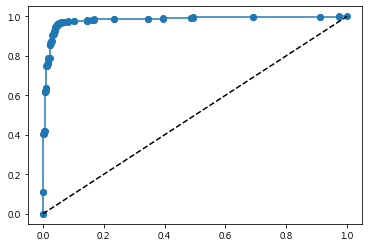

In [51]:
# ROC curve는 이진분류에서만 사용가능하다, 다중분류에선 못함.
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))

# 면적이 커지면 커질수록 좋은것  (그래서 y축에 가까운 선이 나올수록 면적이 커지니까 좋은것이다.)
# 면적이 작으면 작을수록 안좋은것

plt.plot(fpr, tpr, "o-", label="Logistic Regression")  #x,y값, 점의 모양, 
#fpr : False positive rate
#tpr : True positive rate

plt.plot([0,1], [0,1], 'k--', label="Radom guess") # 선
plt.xlabel("False Positive Rate(fall-out//precision)")
plt.ylabel("True Positive Rate(Recall)")
# k-- 는 선의 모양
#선과 멀수록 좋다...? 


    y축에아주 가깝다

이제 예제를 가지고 다시 해보기로 한다.
# 사례 1 : 타이타닉 예제

    성능을 제대로 측정했는지에 대한 관점
   

In [52]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


SibSp : 동승자 여부 
Parch : 배우자 여부 
Fare : 요금
Cabin : 객실번호

In [53]:
# 전처리가 필요없는 컬럼만 따로 모아두기
cols_to_keep = ["Survived","Age", "Fare"]

In [54]:
# 더미 만들는 함수를 이용하여 더미 만들기
dummy_class = pd.get_dummies(df["Pclass"], prefix="Pclass") #prefix : 컬럼이름 보기 좋게
dummy_class.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [57]:
# dummy 성별
dummy_sex = pd.get_dummies(df["Sex"], prefix="Sex")  
dummy_sex
# 보기에 안좋게 무조건 종류에 따라 나눠버린다.
# 근데 학습에는 좋게 되는 것

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [59]:
# 데이터 합치기 
df1 = df[cols_to_keep].join(dummy_class.loc[:, "Pclass1":])
df1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,0,0
2,1,26.0,7.9250,0,0,1
3,1,35.0,53.1000,1,0,0
4,0,35.0,8.0500,0,0,1


In [60]:
# 성별 합치기 / 근데 두개 다 합치지 않고 하나만 합치기
df1 = df1.join(dummy_sex.loc[:, "Sex_male":])
df1.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,22.0,7.2500,0,0,1,1
1,1,38.0,71.2833,1,0,0,0
2,1,26.0,7.9250,0,0,1,0
3,1,35.0,53.1000,1,0,0,0
4,0,35.0,8.0500,0,0,1,1


In [61]:
# 딥러닝은 스스로 전처리하고 그럼
# 그래도 전처리가 중요하긴 하다. 
# 좋은 데이터를 넣어야 좋은 데이터가 나온다. 

# survived를 제외한 나머지 컬럼 추출
train_cols = df1.columns[1:]
train_cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_male'], dtype='object')

In [66]:
# 결측치 확인
np.isnan(df1[train_cols])  #survived를 제외한 나머지 값들 중에 nan값이 있는가

#우선은 결측치가 있는것 같다. 888번쪽에

# 결측치 처리
# df1[train_cols] = df1[train_cols].dropna(axis=0)
# df1["Survived"] = df1["Survived"].dropna(axis=0)

# 실질적으로 삭제하진 않고 0으로 할것이다. 
df1[train_cols] = df1[train_cols].fillna(0)
df1["Survived"] = df1["Survived"].fillna(0)

In [69]:
# 통계적 패키지
# 이 패키지로 통계결과를 쉽게 뽑아낼 수 있다.
# 훈련만 시키고 싶다하면 sklearn만 사용하면 된다. 
import statsmodels.api as sm

#훈련
model = sm.Logit(df1["Survived"], df1[train_cols]).fit()
#sklearn의 Logistic과 같은것 다만 얘는 통계적 부분을 좀 더 집중

model.summary2()

Optimization terminated successfully.
         Current function value: 0.458488
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.311     
Dependent Variable: Survived         AIC:              829.0250  
Date:               2020-02-13 14:53 BIC:              857.7791  
No. Observations:   891              Log-Likelihood:   -408.51   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      1.0371e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age          -0.0159    0.0053   -2.9843  0.0028  -0.0264  -0.0055
Fare          0.0015    0.0021    0.7370  0.4611  -0.0026   0.0056
Pclass_1      2.6932    0.3372    7.9875  0.0000   2.0323   3.3540
Pclass_2      1.8519    0.2670    6.9358  0.0000   1.3286   2.3752
Pclass_3      0.6215    0.1808    3.4377  0.0006   0.2672   0.9758
Sex_male     -2.6151    0.1860  -14.0594  0.0000  -2.9797  -2.2505
=================================================================

"""

나이로는 어린경우가 생존율이 높고  
성별로는 여성이 더 생존율이 높다는것을 알 수 있다.  
  
또 여기서 가장 높은 수치는 1등급에 묶고 있던 승객이 생존율이 높다는 것을 알 수 있다. 

In [70]:
# sklearn LogisticRegression으로 훈련해보기
model2 = LogisticRegression().fit(df1[train_cols], df1["Survived"])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
# 원래는 훈련용 테스트용 나눠야하지만
# 그냥 성능 확인만 하기 위해서 훈련용으로 테스트를 바로 진행한다. 

df1["predict"] = model2.predict(df1[train_cols])  #훈련용 데이터로 테스트 진행해서 예측값을 predict로 담기
df1.head(30)



,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_male,predict
0,0,22.0,7.2500,0,0,1,1,0
1,1,38.0,71.2833,1,0,0,0,1
2,1,26.0,7.9250,0,0,1,0,1
3,1,35.0,53.1000,1,0,0,0,1
4,0,35.0,8.0500,0,0,1,1,0
5,0,0.0,8.4583,0,0,1,1,0
6,0,54.0,51.8625,1,0,0,1,0
7,0,2.0,21.0750,0,0,1,1,0
8,1,27.0,11.1333,0,0,1,0,1
9,1,14.0,30.0708,0,1,0,0,1


    틀린게 꽤나 있다.
    
    여기서 확인을 해봐야할게 
    
    몇개를 틀렸고, 몇개를 맞았고 등등
    confusion Reference 확인해봐야함 

In [72]:
confusion_matrix(df1["Survived"], df1["predict"], labels=[1, 0])

array([[242, 100],
       [ 91, 458]], dtype=int64)

    sklearn의 Logistic Regression은 
    
    오우.. 꽤 많이 틀렸다.
    패턴을 못찾았나보다.
    

In [77]:
# Accuracy  (정확도 계산)

print("1. 정확도 : ", model2.score(df1[train_cols], df1["Survived"]))  
#score는 accuracy만 구해주는 함수이다.  
# 78% 정확도가 나오는데 이걸 믿을만한가
print("1. 정확도2 :", (242+458)/(242+100+91+458))

1. 정확도 :  0.7856341189674523
1. 정확도2 : 0.7856341189674523


In [75]:
# 
print(classification_report(df1["Survived"], df1["predict"], target_names=["class 0", "class 1"]))

              precision    recall  f1-score   support

     class 0       0.82      0.83      0.83       549
     class 1       0.73      0.71      0.72       342

    accuracy                           0.79       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.79      0.79       891



70% 

Text(0, 0.5, 'True Positive Rate(Recall)')

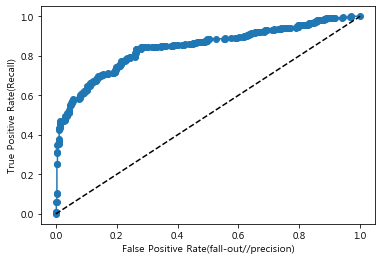

In [81]:
# ROV curve로 그려보자

fpr, tpr, thresholds = roc_curve(df1["Survived"], model2.decision_function(df1[train_cols]))

# 면적이 커지면 커질수록 좋은것  (그래서 y축에 가까운 선이 나올수록 면적이 커지니까 좋은것이다.)
# 면적이 작으면 작을수록 안좋은것

plt.plot(fpr, tpr, "o-", label="Logistic Regression")  #x,y값, 점의 모양, 
#fpr : False positive rate
#tpr : True positive rate

plt.plot([0,1], [0,1], 'k--', label="Radom guess") # 선
plt.xlabel("False Positive Rate(fall-out//precision)")
plt.ylabel("True Positive Rate(Recall)")

    생존, 사망 이진 분류이다.
    면적이 위에서 예시로 한거보단 많이 줄었다. 

### 사례 2 : Cancer

    좋은 성능을 내기 위한 방법에 대한 관점
    

In [83]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [84]:
data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [85]:
# class 컬럼 추가 
data["class"] = pd.Series(cancer.target, dtype="category")
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [86]:
X = data.loc[:, "mean radius": "worst fractal dimension"]  
# x에는 정답을 뺀 데이터만 넣어주고

y = data["class"]  
# y에는 정답만 넣어주고

In [87]:
# 훈련용, 테스트용 나누기

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape)

(426, 30) (143, 30)


In [88]:
log_reg = LogisticRegression().fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [90]:
# sm으로 위와 같은것 뽑아보기
X2 = sm.add_constant(X)  
model = sm.OLS(y, X2).fit() # 선형모델의 최소제곱법
print(model.summary())
#아까는 summary2를 썼지만 여기는 summary

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          6.05e-153
Time:                        15:45:26   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

    p-value를 통해서 어떤 변수가 가장 영향력이 있는지 보고
    그걸 통해서 계산해보자 (의미없는 데이터는 지우고)

    30개 (전체)를 다 한것과 
    의미없는 데이터 지운 것 체크 

In [91]:
from sklearn import metrics
y_pred = log_reg.predict(X_test)
print("정확도 : ", metrics.accuracy_score(y_test, y_pred))



정확도 :  0.958041958041958


    정확도만 보고 믿어서는 안되므로
    metrics로 뿌려보자

In [92]:
cnt = metrics.confusion_matrix(y_test, y_pred)
cnt

array([[52,  1],
       [ 5, 85]], dtype=int64)

    이게 뭐라고...?
    95% 성능을... 뭐?

In [95]:
# p-value가 0.05보다 작은것만 골라내서 측정한다. 
X = data[["mean compactness", "smoothness error", "concavity error", "worst radius", "worst area"]]
y = data["class"]


# 여기 밑에 제대로 못적음..
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
log_reg = LogisticRegression().fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [96]:
y_pred = log_reg.predict(X_test)
print("정확도 : ", metrics.accuracy_score(y_test, y_pred))

#의미가 가장 높은것만 뽑아서 했는데 전체 데이터를 했을때보다 정확도가 낮게 나왔다. 


정확도 :  0.9230769230769231


In [98]:
# p-value가 0.05 이상인것을 골라내서 측정
X = data[["mean texture", "mean smoothness", "mean fractal dimension", "mean symmetry", "texture error"]]
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
log_reg = LogisticRegression().fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [99]:
y_pred = log_reg.predict(X_test)
print("정확도 : ", metrics.accuracy_score(y_test, y_pred))


정확도 :  0.7202797202797203
